# CMSE 201 Project Draft

#### CMSE 201 Final Project
### Name: Tanmay Grandhisiri
### Section: 005
#### Date: 11/13/2022

# Finding best Data Science Books to learn from

## __Research Question__

#### __"Evaluating what kind of books data science students should choose from during their learning journey?"__

## Background Motivation

As a data science student, the technical skills and knowledge required to become a professional data scientist requires extensive learning and practice. Beginner data science processes typically involve numerous tasks ranging from data collection to data exploration to data analysis, visualization, and model production, among others. Because of the number and range of information available on the internet, the learning process during this process can become quite difficult/overwhelming.

We all have different viewpoints on learning and knowledge acquisition; for example, one of my favorite ways of learning is through books. Whatever the subject, a well-written book provides a lot of knowledge and can help you improve your ideas, which is a tremendous help when it comes to learning in general. 

This motivated me to do an exploratory data analysis to determine what makes effective data science books and what common patterns emerge from the available online information.

## Methodology

In this study I will be starting off with simple exploratory data analysis trying to answer questions like: 
* Do more expensive books have better reviews? 
* Is it always true that longer books are more expensive? (Book length vs prices?)
* What are the best Python books?
* What are the best Machine learning books? 

I would then be trying to find out what are the main types/categories of data science books available. I would then be using k-means for clustering the book titles. In order to do that I would be using TF-IDF model (term frequency-inverse document frequency) to convert text into numeric features. 

## Results

### Modelling and Visualization

Import Relevant Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline

Loading the Dataset and previewing the dataset

In [3]:
df = pd.read_csv('amazon_books.csv')
df.head()

,title,author,price,pages,avg_reviews,n_reviews,star5,star4,star3,star2,star1,dimensions,weight,language,publisher,ISBN_13,link,complete_link
0,Becoming a Data Head: How to Think Speak and U...,"[Alex J. Gutman,Jordan Goldmeier]",24.49,272.0,4.6,184,0.74,0.18,0.05,0.02,0.01,6 x 0.62 x 9 inches,12.5 ounces,English,Wiley; 1st edition (April 23 2021),978-1119741749,/Becoming-Data-Head-Understand-Statistics/dp/1...,https://www.amazon.com/Becoming-Data-Head-Unde...
1,Ace the Data Science Interview: 201 Real Inter...,"[Nick Singh,Kevin Huo]",26.00,301.0,4.5,599,0.77,0.10,0.06,0.03,0.04,7 x 0.68 x 10 inches,1.28 pounds,English,Ace the Data Science Interview (August 16 2021),978-0578973838,/Ace-Data-Science-Interview-Questions/dp/05789...,https://www.amazon.com/Ace-Data-Science-Interv...
2,Fundamentals of Data Engineering: Plan and Bui...,"[Joe Reis,Matt Housley]",50.76,446.0,5.0,33,0.96,0.04,0.00,0.00,0.00,7 x 1 x 9.25 inches,1.57 pounds,English,OReilly Media; 1st edition (July 26 2022),978-1098108304,/Fundamentals-Data-Engineering-Robust-Systems/...,https://www.amazon.com/Fundamentals-Data-Engin...
3,Essential Math for Data Science: Take Control ...,[Thomas Nield],44.80,347.0,4.5,27,0.79,0.05,0.05,0.05,0.05,7 x 0.75 x 9 inches,1.23 pounds,English,OReilly Media; 1st edition (July 5 2022),978-1098102937,/Essential-Math-Data-Science-Fundamental/dp/10...,https://www.amazon.com/Essential-Math-Data-Sci...
4,Data Science for Business: What You Need to Kn...,"[Foster Provost,Tom Fawcett]",36.99,413.0,4.5,970,0.71,0.15,0.08,0.03,0.03,7 x 0.9 x 9.19 inches,1.5 pounds,English,OReilly Media; 1st edition (September 17 2013),978-1449361327,/Data-Science-Business-Data-Analytic-Thinking/...,https://www.amazon.com/Data-Science-Business-D...


Understanding the dataset

In [4]:
df.shape

(946, 18)

In [5]:
df.columns

Index(['title', 'author', 'price', 'pages', 'avg_reviews', 'n_reviews',
       'star5', 'star4', 'star3', 'star2', 'star1', 'dimensions', 'weight',
       'language', 'publisher', 'ISBN_13', 'link', 'complete_link'],
      dtype='object')

In [6]:
df.describe()

,price,pages,avg_reviews,n_reviews,star5,star4,star3,star2,star1
count,944.000000,934.000000,823.000000,946.000000,946.000000,946.000000,946.000000,946.000000,946.000000
mean,52.103528,419.356531,4.442163,137.754757,0.625603,0.140835,0.058192,0.026575,0.018732
std,36.590725,203.984911,0.401256,499.485754,0.279219,0.113105,0.061997,0.038293,0.032132
min,4.730000,48.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,31.907500,272.000000,4.300000,5.000000,0.570000,0.070000,0.000000,0.000000,0.000000
50%,43.985000,384.000000,4.500000,25.000000,0.700000,0.140000,0.050000,0.010000,0.000000
75%,56.765000,531.500000,4.700000,91.000000,0.780000,0.190000,0.090000,0.040000,0.030000
max,279.950000,1728.000000,5.000000,7563.000000,1.000000,0.630000,0.400000,0.250000,0.230000


### Exploratory Data Analysis on the dataset 

Creating plots and trying to understand the relationship between the variables in the model

**Scatter Plot number 1** <br>
Plotting the Average reviews vs Price of the book below with a size of each point based on the number of reviews gave an insight that most of the popular books with more number of reviews are under $50 dollars 

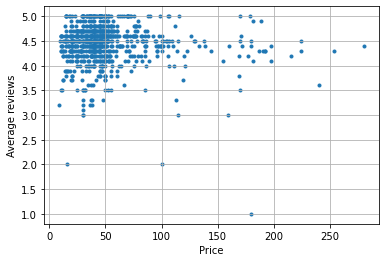

In [7]:
plt.scatter(df['price'],df['avg_reviews'],marker='.')
plt.xlabel('Price')
plt.ylabel('Average reviews')
plt.grid()

**Scatter Plot number 2** <br>
Plotting the Average number of pages vs Price of the book gave an insight that the longer a book is the costlier it is going to be. This can be generally validated true as books with more number of pages can take a longer time to be developed which might make it more costly

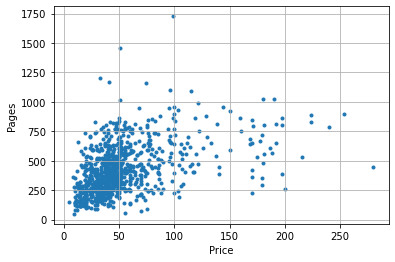

In [8]:
plt.scatter(df['price'],df['pages'],marker='.')
plt.xlabel('Price')
plt.ylabel('Pages')
plt.grid()

Finding out the best Python Books

In [9]:
#Best python books
python_books = df[df['title'].str.contains('Python')]

#Python books with most reviews and highest average ratings 
best_python_books = python_books.nlargest(7, ['n_reviews','avg_reviews'])
best_python_books

,title,author,price,pages,avg_reviews,n_reviews,star5,star4,star3,star2,star1,dimensions,weight,language,publisher,ISBN_13,link,complete_link
104,Python Crash Course 2nd Edition: A Hands-On Pr...,[Eric Matthes],21.49,544.0,4.7,7425,0.81,0.13,0.04,0.01,0.01,7 x 1.2 x 9.25 inches,2.3 pounds,English,No Starch Press; 2nd edition (May 3 2019),978-1593279288,/Python-Crash-Course-2nd-Edition/dp/1593279280...,https://www.amazon.com/Python-Crash-Course-2nd...
368,Python: - The Bible- 3 Manuscripts in 1 book: ...,[Maurice J. Thompson],27.97,375.0,4.3,4033,0.64,0.16,0.10,0.04,0.06,6 x 0.85 x 9 inches,1.11 pounds,English,Independently published (April 28 2018),978-1980953906,/gp/slredirect/picassoRedirect.html/ref=pa_sp_...,https://www.amazon.com/gp/slredirect/picassoRe...
819,Python: For Beginners: A Crash Course Guide To...,[Timothy C. Needham],17.97,135.0,4.3,3034,0.66,0.16,0.10,0.03,0.05,6 x 0.31 x 9 inches,6.7 ounces,English,Independently published (September 21 2017),978-0679722014,/gp/slredirect/picassoRedirect.html/ref=pa_sp_...,https://www.amazon.com/gp/slredirect/picassoRe...
827,Automate the Boring Stuff with Python 2nd Edit...,[Al Sweigart],26.49,592.0,4.7,2538,0.82,0.12,0.03,0.01,0.01,7 x 1.31 x 9.31 inches,2.48 pounds,English,No Starch Press; 2nd edition (November 12 2019),978-1593279929,/Automate-Boring-Stuff-Python-2nd/dp/159327992...,https://www.amazon.com/Automate-Boring-Stuff-P...
320,Python for Everybody: Exploring Data in Python 3,"[Dr. Charles Russell Severance,Sue Blumenberg ...",9.99,247.0,4.6,2467,0.76,0.15,0.05,0.02,0.02,7 x 0.56 x 10 inches,15.2 ounces,English,CreateSpace Independent Publishing Platform (A...,978-1530051120,/Python-Everybody-Exploring-Data/dp/1530051126...,https://www.amazon.com/Python-Everybody-Explor...
218,Python for Data Analysis: Data Wrangling with ...,[William McKinney],53.99,547.0,4.6,1631,0.76,0.15,0.05,0.02,0.02,7 x 1.11 x 9.19 inches,2.08 pounds,English,OReilly Media; 2nd edition (November 14 2017),978-1491957660,/Python-Data-Analysis-Wrangling-IPython/dp/149...,https://www.amazon.com/Python-Data-Analysis-Wr...
428,Deep Learning with Python,[Francois Chollet],32.49,384.0,4.6,1349,0.76,0.13,0.04,0.02,0.04,7.38 x 0.8 x 9.25 inches,1.59 pounds,English,Manning; 1st edition (December 22 2017),978-1617294433,/Deep-Learning-Python-Francois-Chollet/dp/1617...,https://www.amazon.com/Deep-Learning-Python-Fr...


Best Machine Learning Books 

In [10]:
# Select books based on title containing "Machine Learning"
ml_books = df[df['title'].str.contains("Machine Learning")]

# ML books with most reviews and highest average rating
best_ml_books = ml_books.nlargest(7, ['n_reviews','avg_reviews'])
best_ml_books

,title,author,price,pages,avg_reviews,n_reviews,star5,star4,star3,star2,star1,dimensions,weight,language,publisher,ISBN_13,link,complete_link
400,Deep Learning (Adaptive Computation and Machin...,NaN,54.25,800.0,4.3,1862,0.73,0.10,0.05,0.04,0.08,9.1 x 7.2 x 1.1 inches,2.54 pounds,English,The MIT Press; Illustrated edition (November 1...,978-0262035613,/Deep-Learning-Adaptive-Computation-Machine/dp...,https://www.amazon.com/Deep-Learning-Adaptive-...
200,The Hundred-Page Machine Learning Book,[Andriy Burkov],31.99,160.0,4.6,816,0.81,0.10,0.04,0.02,0.03,7.5 x 0.38 x 9.25 inches,13.8 ounces,English,Andriy Burkov (January 13 2019),978-1999579500,/Hundred-Page-Machine-Learning-Book/dp/1999579...,https://www.amazon.com/Hundred-Page-Machine-Le...
571,Pattern Recognition and Machine Learning (Info...,[Christopher M. Bishop],76.10,738.0,4.6,663,0.76,0.13,0.06,0.03,0.02,7.7 x 1.3 x 10.2 inches,4.73 pounds,English,Springer (August 17 2006),978-0387310732,/sspa/click?ie=UTF8&spc=MTo1MjMzODUwNDM1MTQ1Nj...,https://www.amazon.com/sspa/click?ie=UTF8&spc=...
215,Mathematics for Machine Learning,NaN,46.54,398.0,4.7,580,0.80,0.13,0.03,0.02,0.02,7 x 0.92 x 10 inches,1.76 pounds,English,Cambridge University Press; 1st edition (April...,978-1108455145,/Mathematics-Machine-Learning-Peter-Deisenroth...,https://www.amazon.com/Mathematics-Machine-Lea...
559,Introduction to Machine Learning with Python: ...,NaN,45.00,398.0,4.5,565,0.76,0.14,0.03,0.03,0.04,7 x 0.82 x 9.19 inches,1.3 pounds,English,OReilly Media; 1st edition (November 15 2016),978-1449369415,/Introduction-Machine-Learning-Python-Scientis...,https://www.amazon.com/Introduction-Machine-Le...
567,Advances in Financial Machine Learning,[Marcos Lopez de Prado],40.49,400.0,4.5,514,0.76,0.09,0.07,0.03,0.05,6.1 x 1.1 x 9 inches,1.6 pounds,English,Wiley; 1st edition (February 21 2018),978-1119482086,/Advances-Financial-Machine-Learning-Marcos/dp...,https://www.amazon.com/Advances-Financial-Mach...
608,Reinforcement Learning second edition: An Intr...,NaN,66.44,552.0,4.6,460,0.82,0.08,0.02,0.02,0.06,7.25 x 1.48 x 9.31 inches,2.6 pounds,English,Bradford Books; second edition (November 13 2018),978-0262039246,/Reinforcement-Learning-Introduction-Adaptive-...,https://www.amazon.com/Reinforcement-Learning-...


Using the nlargest() method the top 7 Machine Learning and Python books were extracted. 

### Using clustering to find out the main categories of data science books 

Using the TF-IDF vectorizer and k-means cluster, we are trying to find out what are the main types of data science books. 

**Clustering** is an unsupervised machine learning technique that divides the entire data into groups of data such that the data points are similar to the other data points in the same group. Clustering is a very useful technique in order to understand the structure of the dataset. There are many clustering algorithms available, but in this study I will be using K-means clustering to identify the main categories in a dataset. 

**K-means** is an iterative algorithm that just randomly initializes centroids/centers for the clusters in the dataset. Then each datapoint is assigned a nearest cluster. The sum of all distances from each datapoint to the centre of a cluster or __inertia__ is calculated. The goal is then is to minimize the distance between each cluster to the centroid of each cluster. 

<img src="images/kmeans.png" alt="k-means" width="400"/> 1

The first iteration of a k-means algorithm wouldn't make much sense and would not be accurate as the centroids are assigned randomly, however after several iterations the position of the centroids will stop changing (in rare cases it may not converge) but generally is a very effective algorithm. 

In the case of book titles however, clustering text based data is harder than clustering numeric data. Somehow the text data has to be converted into numeric data that a machine can understand. This is fancy terms is called **text vectorization**. 

The goal is to convert a book title into an array of numbers and the array would contain the value for each word that ever appears in one of the book titles. 

<img src="images/tfidf.png" alt="k-means" width="400"/> 2

Zero for the word means the word doesn't occur at all and low number means that the word exists in a title but isn't important for the overall meaning of the title. A higher value means that the word is important for the overall meaning of the title. 

TF-IDF determines this value by multiplying two factors together: 

TF-IDF: Term x within document y

$$ W_{x,y} = tf_{x,y} \times log{(\frac{N}{df_{x}})} $$

* $ tf_{x,y} $ = frequency of x in y

* $ d_{x} $ = number of documents containing x

* $ N $ = total number of documents

$ tf_{x,y} $ is the first parameter. It looks at the frequency of a word within a document or in this case the frequency of a word in a book title. Taking an example title "Best Python book for Python geeks", the word "Python" is repeated twice so this parameter assumes that python is an important word in the book title. 

The second parameter $ d_{x} $ looks more globally looking at how rare the word is across all the documents. This is measured by taking the inverse frequency of the words in all the documents. The $ log $ in the formula is for scaling the extreme values. 

Multiplying these two values gives a quite descriptive picture of the importance of each words, where the higher the value the more important it is and vice versa. 

### Clustering book titles

💡 What are the main types of Data Science books?

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer #importing tfidf

# stop_words: words not useful like 'you','me'
# ngram_range: how many words we want to put together at a time
vectorizer = TfidfVectorizer(stop_words='english',ngram_range=(1,2)) 

X = vectorizer.fit_transform(df['title'])

In [12]:
#transforming titles to a vector
pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out()) 

,001,10,10 machine,100,100 essential,100 recipes,100 solved,101,101 data,1098,...,youll likely,young,young children,youtube,youâ,youâ new,zed,zed shaws,²s,²s statistics
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
941,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
942,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
943,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
944,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Now it is time to import k-means from scikit-learn however, there is a small challenge in implementing k-means. We don't know in advance what the optimal number of clusters are, so it has to be found out before it can be implemented using scikit-learn. 

The **Elbow Method** is a popular method for finding out optimal number of clusters. We loop through the values of k from 1 to 9 and calculate the distortion and inertia for each value of k in the specified range. 

Note: **Distortion** is the average squared distances from the center of a cluster

In [17]:
#finding optimum number of clusters for kmeans

from sklearn.cluster import KMeans
sosd = []
K = range(2,10)

for k in K:
    km = KMeans(n_clusters=k, max_iter=600, n_init=10)
    km.fit(X)
    sosd.append(km.inertia_)

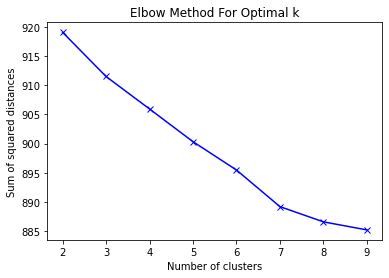

In [18]:
# Visualizing the sum of squared distances
plt.plot(K, sosd, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Method For Optimal k')
plt.show()

The higher the number of clusters, the lower the sum of squared distance is. This makes sense because if each datapoint is assigned its own cluster then then its distance to the center of the cluster would be **zero**. 

To identify the best number of clusters, we must choose the value of k at the "elbow," or the point at which the distortion/inertia begins to decrease linearly. In this case **6** seems to be the optimal number of clusters. 

In [29]:
#Get the clusters

true_k = 6
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=600, n_init=10)
model.fit(X)

# Get prediction/ labels
labels = model.labels_
book_cl = pd.DataFrame(list(zip(df["title"],labels)),columns=['title','cluster'])
print(book_cl.sort_values(by=['cluster']))

                                                 title  cluster
420  Math for Deep Learning: What You Need to Know ...        0
514  Culture in School Learning: Revealing the Deep...        0
513  Artificial Intelligence Machine Learning and D...        0
512  Hands-On Music Generation with Magenta: Explor...        0
511  Autonomous Robotics and Deep Learning (Springe...        0
..                                                 ...      ...
133  Data Analytics: Practical Guide to Leveraging ...        5
130              Data Analysis with Python and PySpark        5
287             Think Stats: Exploratory Data Analysis        5
126  Murachs Python for Data Analysis (Training & R...        5
163  SQL for Data Analytics: Perform fast and effic...        5

[946 rows x 2 columns]


#### What do these clusters actually mean?

An easiest way to understand what these clusters actually mean is to print out the top terms of each cluster however, using a word cloud to describe the clusters would be an interesting way to visualize the clusters. 

In [30]:
%pip install wordcloud==1.8.2.2

Note: you may need to restart the kernel to use updated packages.


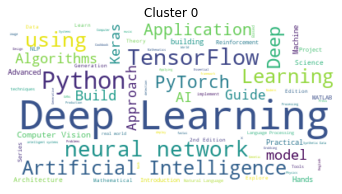

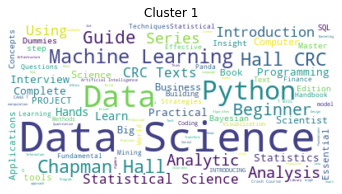

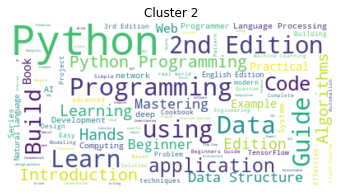

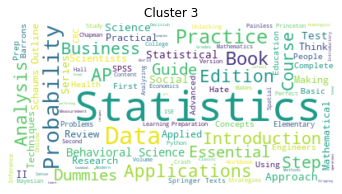

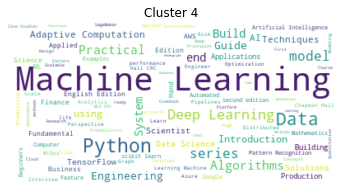

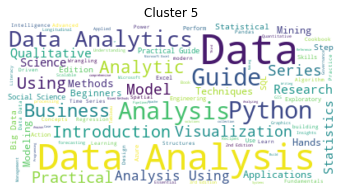

In [40]:
#Creating a wordcloud for each cluster
from wordcloud import WordCloud

for k in range(true_k):
   text = book_cl[book_cl.cluster == k]['title'].str.cat(sep=' ')
   wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)

   # Create subplot
   plt.figure(figsize=(20,20))
   plt.subplot(2, 3, k+1).set_title("Cluster " + str(k)) 
   plt.plot()
   plt.imshow(wordcloud, interpolation="bilinear")
   plt.axis("off")

plt.show()

## Discussions and Conclusions

From the word cloud we are able to determine that the most important words for each cluster/category is: 
* Cluster 1: Deep Learning
* Cluster 2: Data science
* Cluster 3: Python (Programming)
* Cluster 4: Statistics
* Cluster 5: Machine Learning
* Cluster 6: Data Analysis

This does make sense as a data science enthusiast these generally are the different areas/fields of data science. In regards with the books, these 6 categories of books are very famous and from my personal experiences, books are divided into these 6 categories when talking about data science. 

## Citations

<ol>
<li> Jeffares, Alan. “K-Means: A Complete Introduction.” Towards Data Science, 19 Nov. 2019, https://towardsdatascience.com/k-means-a-complete-introduction-1702af9cd8c. 
<li> Analytics, Vu Data. “I Analyzed 1000 Data Science Books .” YouTube, 9 Nov. 2022, https://youtu.be/N0o-Bjiwt0M. 
<li> “Understanding TF-ID: A Simple Introduction.” MonkeyLearn Blog, 10 May 2019, https://monkeylearn.com/blog/what-is-tf-idf/. 
<li> Huilgol, Purva. “Bow Model and TF-IDF for Creating Feature from Text.” Analytics Vidhya, 23 Dec. 2020, https://www.analyticsvidhya.com/blog/2020/02/quick-introduction-bag-of-words-bow-tf-idf/. 
<li> “Elbow Method for Optimal Value of K in Kmeans.” GeeksforGeeks, 22 Aug. 2022, https://www.geeksforgeeks.org/elbow-method-for-optimal-value-of-k-in-kmeans/. 
<li> Silva, Giovana   D. da. “Using Full-Text Content to Characterize and Identify Best Seller Books.” Arxiv, 6 Oct. 2022, https://arxiv.org/pdf/2210.02334. 
</ol>